In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['lable']=iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),lable
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [8]:
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


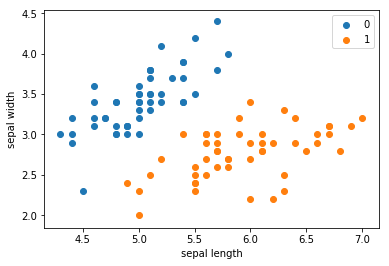

In [9]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [16]:
X = np.asarray(df.iloc[:100,[0,1]])
y = np.asarray(df.iloc[:100,-1])
y = np.asarray([-1 if i == 0 else 1 for i in y])

In [24]:
class Model:
    def __init__(self):
        self.w = np.ones(2,dtype=np.float32)
        self.b = 0
        self.lr = 0.1
    
    def sign(self, w, x, b):
        y = np.dot(w,x)+b
        return y
    
    def fit(self,X,y):
        flag = True
        while flag:
            flag = False
            for i in range(len(X)):
                if y[i]*self.sign(self.w, X[i], self.b)<=0:
                    self.w = self.w + self.lr*np.dot(y[i], X[i])
                    self.b = self.b + self.lr*y[i]
                    flag = True
        print('done')
        
        

In [25]:
perceptron = Model()

In [27]:
perceptron.fit(X,y)

done


In [33]:
x_points = np.linspace(4,7,10)
y = -(perceptron.w[0]*x_points+perceptron.b)/perceptron.w[1]

Text(0,0.5,'sepal width')

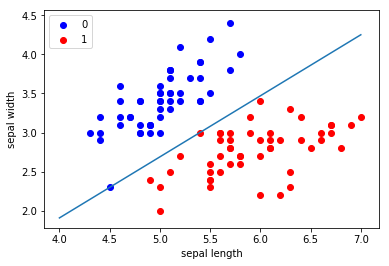

In [38]:
plt.plot(x_points,y)
plt.scatter(X[:50, 0], X[:50, 1], color='blue', label='0')
plt.scatter(X[50:, 0], X[50:, 1], color='red', label='1')
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')